# **Importing Libraries that will be used in the Colab Notebook**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Viewing the data in the training dataset**

In [ ]:
train_data = pd.read_csv("/content/kaggle/train.csv")
y_original = train_data['SalePrice'] # Storing the original values for later use when comparing the actual and predicted values
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data = pd.read_csv("/content/kaggle/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
print(train_data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# We drop the Id column since it isn't necessary for model training
train_data = train_data.drop("Id", axis=1)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.nunique()

,0
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,1073
Street,2
...,...
MoSold,12
YrSold,5
SaleType,9
SaleCondition,6


In [ ]:
# Viewing Correlation Matrix
train_data.corr(numeric_only = True)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


# **Visualizing the data with matplotlib**


*   Selected 3 examples of continuous and categorical features in the dataset
*   Plotted the histograms to illustrate the distribution of the data



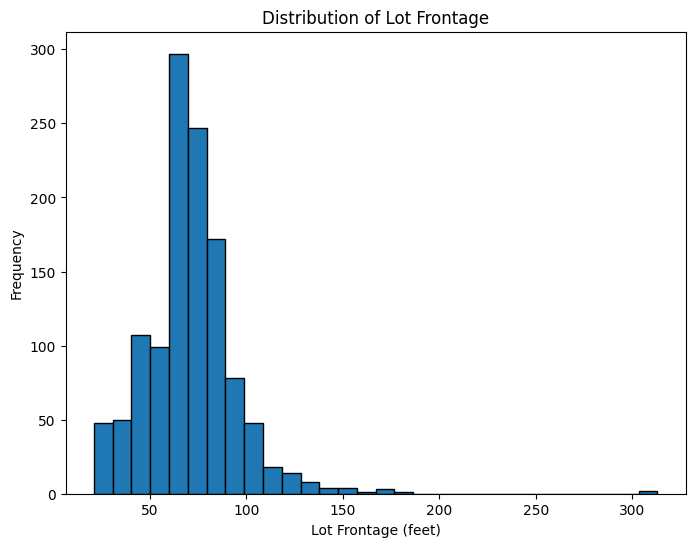

In [ ]:
# Example 1: LotFrontage (Continuous)
plt.figure(figsize=(8, 6))
plt.hist(train_data['LotFrontage'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Lot Frontage (feet)')
plt.ylabel('Frequency')
plt.title('Distribution of Lot Frontage')
plt.show()

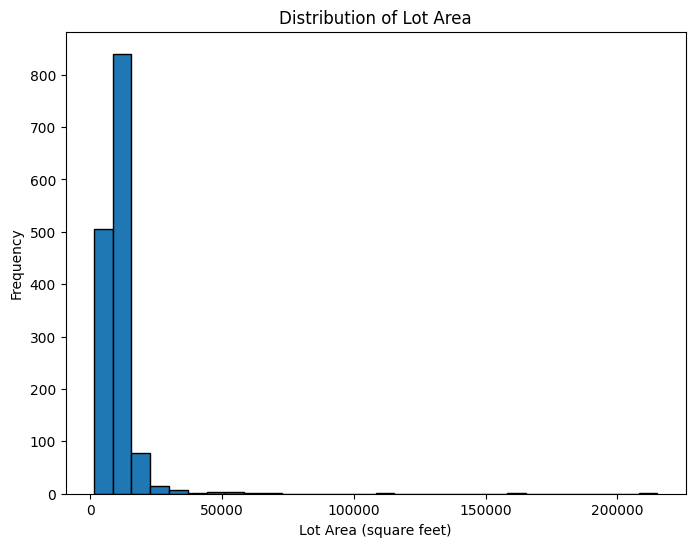

In [ ]:
# Example 2: LotArea (Continuous)
plt.figure(figsize=(8, 6))
plt.hist(train_data['LotArea'], bins=30, edgecolor='black')
plt.xlabel('Lot Area (square feet)')
plt.ylabel('Frequency')
plt.title('Distribution of Lot Area')
plt.show()

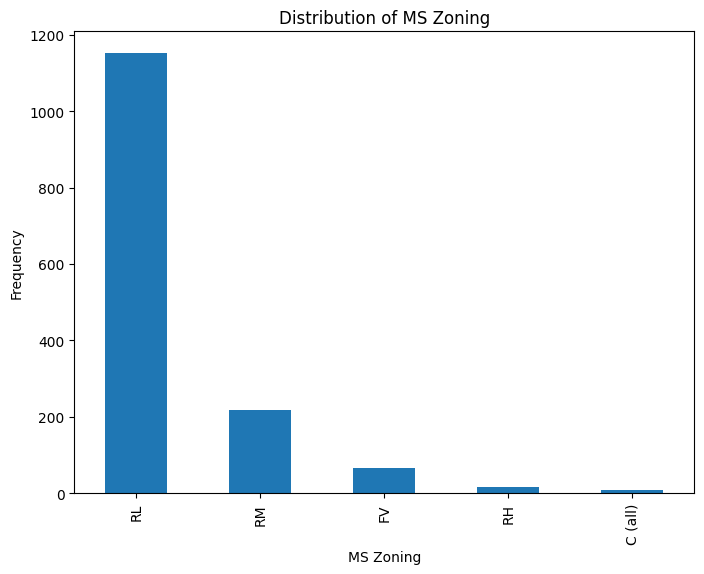

In [ ]:
# Example 3: MSZoning (Categorical)
plt.figure(figsize=(8, 6))
train_data['MSZoning'].value_counts().plot(kind='bar')
plt.xlabel('MS Zoning')
plt.ylabel('Frequency')
plt.title('Distribution of MS Zoning')
plt.show()

# **Pre-processing the data and encoding with Scikit-learn One-Hot Encoding(OHE)**

**First Step: Handle missing values in the dataset**

*   Using the most frequent value for the categorical features and the mean for the numerical features.



In [ ]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
      # Use the mode from the training data
      train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    elif train_data[col].dtype in ['int64', 'float64']:
      train_data[col] = train_data[col].fillna(train_data[col].mean())

for col in test_data.columns:
    if test_data[col].dtype == 'object':
      # Check if the training set has this column
        mode_val = train_data[col].mode()[0] if col in train_data.columns else "Unknown"
        test_data[col] = test_data[col].fillna(mode_val)
    elif test_data[col].dtype in ['int64', 'float64']:
        mean_val = train_data[col].mean() if col in train_data.columns else test_data[col].mean()
        test_data[col] = test_data[col].fillna(mean_val)

**Second Step: Normalize the Numerical Features**


*    Features that contain large differences in scale can affect the models performance.



In [ ]:
# Get all numerical columns from the training dataset.
num_cols_train = train_data.select_dtypes(include=np.number).columns

# Create a copy to store normalization parameters from the training set.
norm_params = {}
for col in num_cols_train:
  min_val = train_data[col].min()
  max_val = train_data[col].max()
  if max_val - min_val != 0:
    norm_params[col] = (min_val, max_val)
    # Normalize training data using training min and max
    train_data[col] = (train_data[col] - min_val) / (max_val - min_val)
  else:
    train_data[col] = 0.0

# Doing the same process for test data
num_cols_test = test_data.select_dtypes(include=np.number).columns
for col in num_cols_test:
  if col in norm_params:
    min_val, max_val = norm_params[col]
    test_data[col] = (test_data[col] - min_val) / (max_val - min_val)
    if max_val - min_val != 0:
      test_data[col] = (test_data[col] - min_val) / (max_val - min_val)
  else:
      test_data[col] = 0.0

**Third Step: One-Hot Encoding**

*   In this example, I use MSZoning as an example.
*   One-Hot encoding will convert categories into binary vectors.
*   This will prevent the model from assuming an ordinal relationship between the categories, which might not exist.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()

# One-Hot Encoding categorical columns, dropping the first category to avoid multicollinearity
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(train_data[categorical_features])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate the encoded ones
train_data = train_data.drop(columns=categorical_features).reset_index(drop=True)
train_data = pd.concat([train_data, encoded_df], axis=1)

# Doing the same for the test_data
encoded_cats_test = encoder.transform(test_data[categorical_features])
encoded_df_test = pd.DataFrame(encoded_cats_test, columns=encoder.get_feature_names_out(categorical_features))

test_data = test_data.drop(columns=categorical_features).reset_index(drop=True)
test_data = pd.concat([test_data, encoded_df_test], axis=1)

# **Visualization of the encoded data**

**Visual Heatmap of the encoded subset**


*   Shows a Heatmap with the first 20 rows One-Hot Encoded 'MSZoning' data



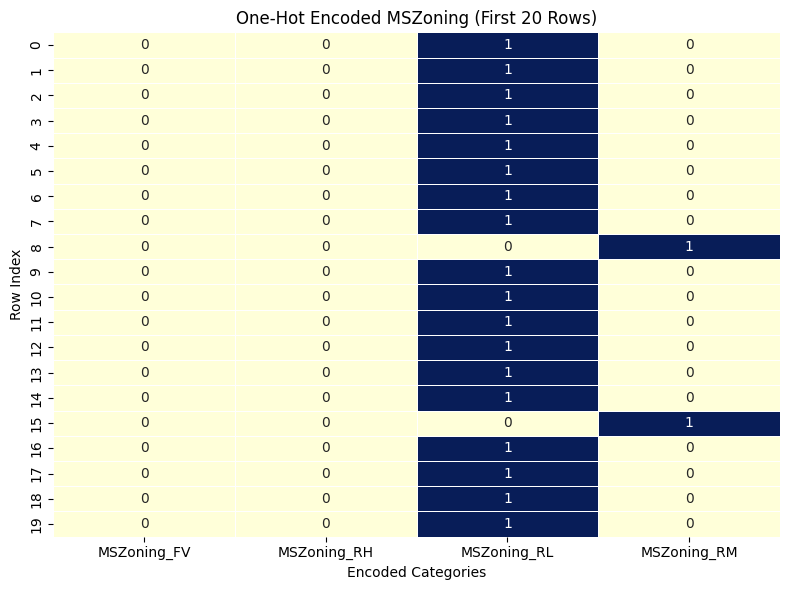

In [ ]:
import seaborn as sns

# Visualization of the One-Hot Encoded 'MSZoning' Data
# In the pre-processing code, 'MSZoning' was encoded into new columns.
encoded_columns = [col for col in train_data.columns if col.startswith("MSZoning_")]

# For visualization, we can display the one-hot encoded columns for a small subset of rows.
encoded_subset = train_data[encoded_columns].head(20)

plt.figure(figsize=(8, 6))
sns.heatmap(encoded_subset, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.title("One-Hot Encoded MSZoning (First 20 Rows)")
plt.xlabel("Encoded Categories")
plt.ylabel("Row Index")
plt.tight_layout()
plt.show()

# **Implementing Ordinary Least Squares (OLS) from scratch**


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute the correlation of each numerical column with 'SalePrice'.
correlations = train_data.corr()['SalePrice'].drop('SalePrice')

# Select only the features with correlation of -0.1 or lower and 0.1 or higher
features = correlations[abs(correlations) >= 0.1].index.tolist()
print("Selected Features:", features)

# Define the target and feature set.
X = train_data[features].values # Feature matrix
y = train_data['SalePrice'].values # Target vector

# Add an intercept term to X containing all ones.
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

def ols_fit(X, y):
  """
  Computes the OLS coefficients.
  """
  # Compute X^T * X
  XtX = X.T.dot(X)
  beta = np.linalg.inv(XtX).dot(X.T).dot(y)
  return beta

beta = ols_fit(X, y)

def ols_predict(X, beta):
  """
  Predicts using the OLS coefficients.
  """
  return X.dot(beta)

y_pred = ols_predict(X, beta)

# Calculating Mean Squared Error (MSE) and R² Score.
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Calculating the metrics.
print(f"Training set Mean Squared Error: {mse:.5f}")
print(f"Training set R² Score: {r2:.2f}")

Selected Features: ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_HLS', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_Duplex', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'E

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and evaluation sets (80/20 split) without a fixed random state so the training and eval data shuffle.
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2)

# Normalize y (target variable).
y_min, y_max = y_train.min(), y_train.max()
y_train = (y_train - y_min) / (y_max - y_min)
y_eval = (y_eval - y_min) / (y_max - y_min)

# Compute min, max, and range for X_train.
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)
X_train_range = X_train_max - X_train_min

# Replace any zero range values with 1 to avoid division by zero.
X_train_range[X_train_range == 0] = 1

X_train = (X_train - X_train_min) / X_train_range
X_eval = (X_eval - X_train_min) / X_train_range

# Check for zero-variance features (constant columns) and remove them.
constant_cols = np.where(np.all(X_train == X_train[0, :], axis=0))[0]
if len(constant_cols) > 0:
  # print(f"Removing constant columns: {constant_cols}")
  X_train = np.delete(X_train, constant_cols, axis=1)
  X_eval = np.delete(X_eval, constant_cols, axis=1)

# Add an intercept column (all ones) to X after removing constant columns.
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_eval = np.concatenate([np.ones((X_eval.shape[0], 1)), X_eval], axis=1)

# Reusing the OLS functions from the previous cell to train the model and make predictions.
beta = ols_fit(X_train, y_train)
y_pred = ols_predict(X_eval, beta)

# Reverse the normalization of y_pred for evaluation.
y_pred = y_pred * (y_max - y_min) + y_min
y_eval_actual = y_eval * (y_max - y_min) + y_min  # Convert back for comparison

# Calculating the metrics.
mse = mean_squared_error(y_eval_actual, y_pred)
r2 = r2_score(y_eval_actual, y_pred)

# Calculating the metrics.
print(f"Training set Mean Squared Error: {mse:.5f}")
print(f"Training set R² Score: {r2:.2f}")

Training set Mean Squared Error: 0.00118
Training set R² Score: 0.89


In [ ]:
# Reverse normalization to get actual prices
origin_y_min = y_original.min()
origin_y_max = y_original.max()

y_eval_actual = y_eval * (origin_y_max - origin_y_min) + origin_y_min
y_pred_actual = y_pred * (origin_y_max - origin_y_min) + origin_y_min

# Create a DataFrame with the corrected actual and predicted prices
results_df = pd.DataFrame({'Actual': y_eval_actual, 'Predicted': y_pred_actual,
    'Residuals': y_eval_actual - y_pred_actual})

# Format as currency
results_df['Actual'] = results_df['Actual'].apply(lambda x: "${:,.2f}".format(x))
results_df['Predicted'] = results_df['Predicted'].apply(lambda x: "${:,.2f}".format(x))
results_df['Residuals'] = results_df['Residuals'].apply(lambda x: "${:,.2f}".format(x))

# Print the first 10 rows as a table
print("\nComparisson of Actual vs. Predicted House Prices:")
print(results_df.head(10))


Comparisson of Actual vs. Predicted House Prices:
        Actual    Predicted    Residuals
0  $174,000.00  $190,166.49  $-16,166.49
1  $135,000.00   $84,313.86   $50,686.14
2  $132,500.00  $144,976.20  $-12,476.20
3  $185,900.00  $182,548.01    $3,351.99
4   $81,000.00   $95,757.43  $-14,757.43
5  $220,000.00  $219,548.58      $451.42
6  $157,000.00  $159,605.02   $-2,605.02
7  $231,500.00  $194,430.74   $37,069.26
8  $252,678.00  $229,874.08   $22,803.92
9  $224,900.00  $202,657.39   $22,242.61


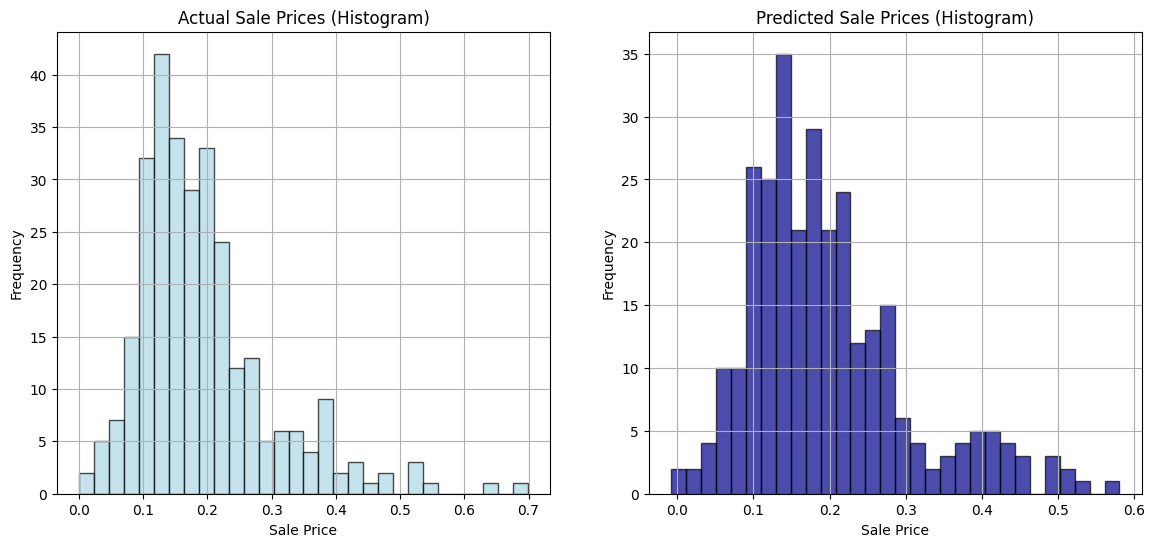

In [ ]:
# Histogram: Actual vs. Predicted
# Create a figure with two subplots (side-by-side)
fig, (ax_hist_actual, ax_hist_pred) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Histogram for Actual Prices
ax_hist_actual.hist(y_eval, bins=30, color='lightblue', edgecolor='k', alpha=0.7)
ax_hist_actual.set_title('Actual Sale Prices (Histogram)')
ax_hist_actual.set_xlabel('Sale Price')
ax_hist_actual.set_ylabel('Frequency')
ax_hist_actual.grid(True)

# Subplot 2: Histogram for Predicted Prices
ax_hist_pred.hist(y_pred, bins=30, color='darkblue', edgecolor='k', alpha=0.7)
ax_hist_pred.set_title('Predicted Sale Prices (Histogram)')
ax_hist_pred.set_xlabel('Sale Price')
ax_hist_pred.set_ylabel('Frequency')
ax_hist_pred.grid(True)

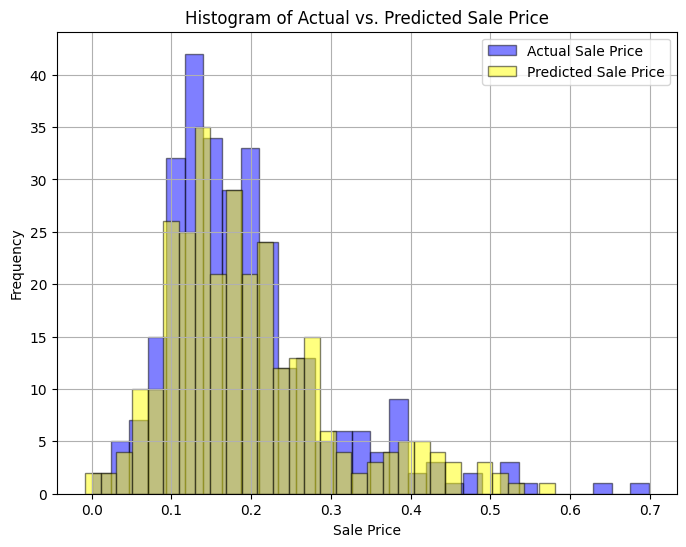

In [ ]:
# Histogram: Overlapping Actual vs. Predicted
plt.figure(figsize=(8, 6))

# Create overlapping histograms for Actual and Predicted Sale Prices.
plt.hist(y_eval, bins=30, alpha=0.5, color='blue', edgecolor='black', label='Actual Sale Price')
plt.hist(y_pred, bins=30, alpha=0.5, color='yellow', edgecolor='black', label='Predicted Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs. Predicted Sale Price')
plt.grid(True)
plt.legend()
plt.show()

# **Using the trained model to predict the test datasets Sale Prices**

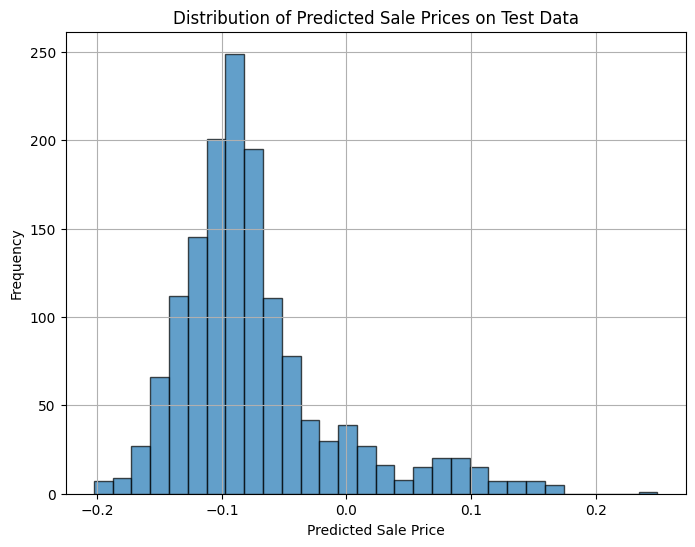

In [ ]:
# Prepare the test feature matrix.
X_test = test_data[features].values # Same features as in training.

# Add an intercept column (of ones) to X_test.
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Predict and Plot the Test Data Sale Prices

# Use the model on the training set to predict Sale Prices.
y_test_pred_norm = ols_predict(X_test, beta) # Same beta used in training.

# Plotting the distribution of the predicted sale prices on a histogram
plt.figure(figsize=(8, 6))
plt.hist(y_test_pred_norm, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Sale Prices on Test Data')
plt.grid(True)
plt.show()

**Creating the submission file after Reversing normalization**

In [ ]:
# Reverse the normalization to convert predictions back to their original scale.
y_test_pred = y_test_pred_norm * (origin_y_max - origin_y_min) + origin_y_min

# Read the original test.csv to retrieve the 'Id' column.
test_csv = pd.read_csv('/content/kaggle/test.csv')

# Create the submission DataFrame with the proper format.
submission = pd.DataFrame({'Id': test_csv['Id'], 'SalePrice': abs(y_test_pred)})
submission.to_csv('submission.csv', index=False)
print("Submission file created: 'submission.csv'")

Submission file created: 'submission.csv'
